# 1. Import libraries

In [333]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2. Acquire the data

In [334]:
df=pd.read_csv("ratings.csv")
df.head()

,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,...,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made,Unnamed: 29,Ratings,Team_id
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65,109,...,23.69,7,20.3,0,0,8,0,NaN,5,1
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.8,94,...,20,7.74,15.5,1,0,5,0,NaN,5,2
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46,26,...,47.66,10.21,28,0,0,2,0,NaN,5,3
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.2,156,...,27.5,7.85,21,0,0,3,0,NaN,5,4
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,...,-,-,-,-,-,2,2,NaN,5,5


# 3. Preprocess the data 

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Team                  631 non-null    object 
 1   Player                631 non-null    object 
 2   Tournament            631 non-null    object 
 3   Matches               631 non-null    int64  
 4   Batting Innings       631 non-null    object 
 5   Not Out               631 non-null    object 
 6   Runds Scored          631 non-null    object 
 7   Highest Score         631 non-null    object 
 8   Batting Average       631 non-null    object 
 9   Balls Faced           631 non-null    object 
 10  Batting Strike Rate   631 non-null    object 
 11  100                   631 non-null    object 
 12  50                    631 non-null    object 
 13  0                     631 non-null    object 
 14  4s                    631 non-null    object 
 15  6s                    6

In [336]:
df=df[["Team","Player","Tournament","Matches","Ratings","Team_id"]]

In [337]:
df.head()

,Team,Player,Tournament,Matches,Ratings,Team_id
0,Delhi Daredevils,CH Morris,IPL 2016,12,5,1
1,Delhi Daredevils,CH Morris,IPL 2017,9,5,2
2,Delhi Daredevils,CH Morris,IPL 2018,4,5,3
3,Delhi Daredevils,JP Duminy,IPL 2016,10,5,4
4,Delhi Daredevils,Q de Kock,IPL 2016,13,5,5


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team        631 non-null    object
 1   Player      631 non-null    object
 2   Tournament  631 non-null    object
 3   Matches     631 non-null    int64 
 4   Ratings     631 non-null    int64 
 5   Team_id     631 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 22.2+ KB


In [339]:
df.isna().sum()

Team          0
Player        0
Tournament    0
Matches       0
Ratings       0
Team_id       0
dtype: int64

In [340]:
df.describe()

,Matches,Ratings,Team_id
count,631.000000,631.000000,631.00000
mean,8.332805,2.795563,316.00000
std,5.055268,1.396497,182.29829
min,1.000000,1.000000,1.00000
25%,4.000000,1.000000,158.50000
50%,8.000000,3.000000,316.00000
75%,13.000000,4.000000,473.50000
max,17.000000,5.000000,631.00000


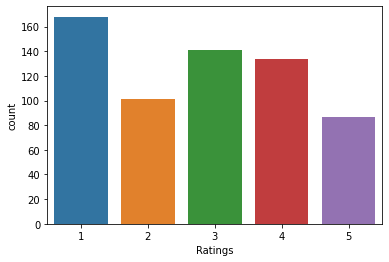

In [366]:
sns.countplot(x="Ratings",data=df)

In [342]:
X=df.drop(["Team","Player","Tournament","Ratings"],axis=1)
y=df["Ratings"]

In [343]:
X

,Matches,Team_id
0,12,1
1,9,2
2,4,3
3,10,4
4,13,5
...,...,...
626,6,627
627,12,628
628,7,629
629,8,630


In [344]:
y

0      5
1      5
2      5
3      5
4      5
      ..
626    4
627    4
628    4
629    4
630    4
Name: Ratings, Length: 631, dtype: int64

In [345]:
X.shape

(631, 2)

In [346]:
y.shape

(631,)

# 5. Split the data into training and testing 

In [347]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=11)

In [348]:
X_train.shape

(473, 2)

In [349]:
X_test.shape

(158, 2)

In [350]:
y_test.shape

(158,)

In [351]:
y_train.shape

(473,)

In [352]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# 6. Train the model

In [353]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=112)
result=model.fit(X_train,y_train)

In [354]:
y_pred=result.predict(X_test)

In [355]:
y_pred

array([4, 1, 2, 4, 1, 4, 3, 2, 4, 4, 3, 1, 2, 3, 1, 3, 3, 4, 4, 5, 3, 4,
       1, 1, 4, 3, 3, 3, 3, 3, 2, 5, 1, 4, 1, 1, 4, 4, 2, 3, 2, 1, 5, 4,
       1, 5, 2, 2, 3, 1, 4, 3, 3, 3, 1, 3, 1, 5, 5, 3, 3, 1, 5, 3, 2, 3,
       5, 1, 5, 4, 4, 1, 3, 5, 1, 4, 1, 1, 1, 1, 4, 3, 4, 5, 1, 4, 1, 4,
       1, 2, 5, 2, 4, 3, 1, 4, 1, 2, 3, 3, 4, 2, 2, 5, 5, 3, 2, 1, 3, 5,
       1, 1, 2, 2, 5, 3, 1, 5, 2, 2, 1, 5, 1, 5, 3, 4, 2, 3, 1, 3, 4, 3,
       3, 4, 5, 4, 5, 4, 1, 4, 2, 3, 4, 4, 3, 5, 3, 3, 3, 3, 4, 1, 3, 2,
       3, 3, 4, 1], dtype=int64)

# 7. Deploy the model

In [364]:
predictions=result.predict([[10,4]])
predictions
if(predictions[0]==4):
    print("Great Form")
elif (predictions[0]==5):
      print("Excellent form")
elif (predictions[0]==3):
    print("Good form")
elif (predictions[0]==2):
    print("In-form")
elif (predictions[0]==1):
    print("Out of form")

Great Form


In [358]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9936708860759493